In [1]:
!pip3 install plotly cufflinks pandas 

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import plotly.graph_objects as go


# Linear regression as a machine learning task

## 1 Generate artificial data

We artificially generate a two-dimensional dataset so that it can be correctly described with a linear relation between the two dimensions x and y:

y = a * x + b

We thus define a linear regression model with parameters (a,b), and our goal is to find the best values for a and b with a machine learning approach.


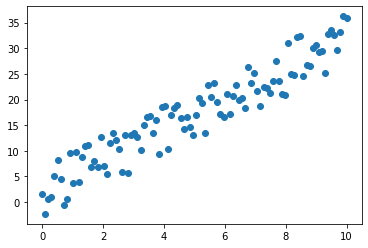

In [3]:
n_sample = 100
a_true = 3
b_true = 2

rng = 10

x = np.linspace(0, rng, n_sample)
y = a_true * x + b_true + rng *(np.random.random_sample(n_sample)- .5)

plt.scatter(x,y)
plt.show()


## 2 Define the regression model

We implement the linear regression model in the LinReg class. Complete the following code.

**Q1**. **Prediction**: complete the forward(x) function to return the prediction of the model with its current parameters



**Q2.** **Loss**: we are using the mean squarred error (MSE) between the predicted and true value of y.
- Write down the formula for MSE given x, y , a and b, and complete the two first lines of the *compute_loss* method
- Compute the partial derivatives of the loss with respect to a and b and complete the corrsponding lines in *compute_loss* 

**Q3.** **Parameter update** we are using the update rule of gradient descent
- Complete the *update_parameters* method to implement the update rule

Quickly test the methods to make sure averything works 

In [28]:
class LinReg:
    def __init__(self, a, b ):
        self.a = a
        self.b = b
        self.grad_a = None
        self.grad_b = None
    
    def forward(self,x):
        return self.a*x+self.b
    
    def compute_loss(self, x, y_true, compute_gradients = True):
        prediction = self.forward(x)
        loss = ((y_true - prediction)**2).mean(axis=0)
        
        if compute_gradients:
            # TO DO
            # TO DO
        return loss
    
    def update_parameters(self, learning_rate = 0.1):
        # TO DO
        # TO DO     
        

**Q5**. **Training loop** The following function is designed to iteratively train our linear regression model
- Explain the role of each parameter of the function
- One line of code is missing for the function to do what it is supposed to, complete it.

In [35]:
def train_model(model, learning_rate=0.001, epochs=2000, record_every=100):
    trainlog = pd.DataFrame(columns = ['train_loss','a', 'b']) # DataFrame used to keep track of training

    print('Initial Mean Squarred Error: {}'.format(model.compute_loss(x,y, compute_gradients=False)))
    # Training loop
    for epoch in range(epochs):
        loss = None # TO DO
        time.sleep(.001)
        print('Epoch {}: loss {}'.format(epoch+1, loss), end='\r')
        # TO DO
        
        if epoch % record_every == 0:
            trainlog.loc[epoch+1] = loss , model.a, model.b
    print('Final Mean Squarred Error: {}'.format(model.compute_loss(x,y, compute_gradients=False)))
    print('Final parameters: a {} b {}'.format(model.a, model.b))

    #Visualize result
    plt.scatter(x,y)
    plt.plot(x,a_0*x+b_0, label='initial parameters', color='r')
    plt.plot(x,model.a*x+model.b, label='after training', color='g')
    plt.legend()
    plt.show()

    trainlog['train_loss'].iplot(xTitle='Epoch', yTitle='MSE', title='TRAINLOG')

    return trainlog

**Q6.** **Train the model** Once everything is ready, run the follwing cells to train the model
- Does the model converge to a minima ? Are the obtained values for a, and b coherent with the true values?
- Try training the model with different learning rates (for example: 0.1, 0.01, 0.0001)
- Comment what happens, and chose the value that you think are the best
- After how many epochs does the model converge to its final value? 


In [36]:
a_0, b_0 = np.random.sample(2) #Initial random parameters (random)

Initial Mean Squarred Error: 343.1720697749745
Final Mean Squarred Error: 6.399035118640882
Final parameters: a 2.9383499109826676 b 2.220504607613617


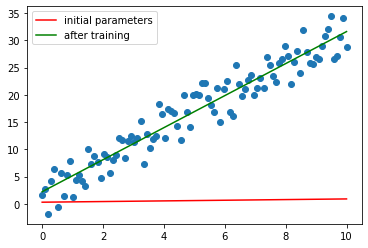

AttributeError: 'Series' object has no attribute 'iplot'

In [38]:
model = LinReg(a_0,b_0)
trainlog = train_model(model, learning_rate=0.01, epochs=2000, record_every=100)

**Q7** **Loss Landscape** Use the function *visualize_landscape* to ... visualise the loss landscape
- Why does the function take (x,y) as arguments ?
- Comment the shape of the loss landscape and the path taken by the gradient descent iterations

In [39]:
def visualize_landscape(x,y,trainlog):
    param_range = 20
    N = 30
    ar = np.linspace(-param_range//2, param_range//2, N)
    br = np.linspace(-param_range//2, param_range//2, N)

    loss_landscape = (((ar[:,None]*x + br[:, None, None] - y[None, None, :])**2).mean(axis=-1))

    fig = go.Figure(data=[go.Surface(z=loss_landscape, x=ar, y=br),
                         go.Scatter3d(x = trainlog['a'], y  = trainlog['b'], z = trainlog['train_loss'],marker=dict(
            size=3,
            color=trainlog.index,
            colorscale='Reds',
        ))])
    fig.update_layout(title='Loss Landscape', autosize=False,
                      width=1000, height=1000,
                    scene = dict(
                        xaxis = dict(title = 'Parameter a'),
                        yaxis = dict(title = 'Parameter b'),
                        zaxis = dict(title = 'Loss')))
    fig.show()

In [40]:
visualize_landscape(x,y,trainlog)

NameError: name 'trainlog' is not defined

**Q8**. **Momentum** We now want to train our linear model with momentum to make convergences faster.
- Complete the following  class to implement gradient descent with moment
- Train this model using the previous functions, is convergence faster indeed ?
- Try different values for the momentum parameter and comment on its effect.
- Visualize the path taken of the model with momentum in the loss landscape and comment. 

In [0]:
class LinReg_momentum:
    def __init__(self, a, b, momentum=0.9 ):
        self.a = a
        self.b = b
        self.grad_a = 0
        self.grad_b = 0
        self.previous_update_a = 0
        self.previous_update_b = 0 
        self.momentum=momentum
        
    def forward(self,x):
        return None # TODO
    
    def compute_loss(self, x, y_true, compute_gradients = False):
        prediction = None # TODO
        loss = None # TODO
        if compute_gradients:
            self.grad_a = None # TODO
            self.grad_b = None # TODO
        return loss
    
    def update_parameters(self, learning_rate = 0.1):
        # TODO
        pass

**Q Bonus**: Implement **RMSProp** (https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) to train your model and comment on its difference with the two other methods